In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cityblock

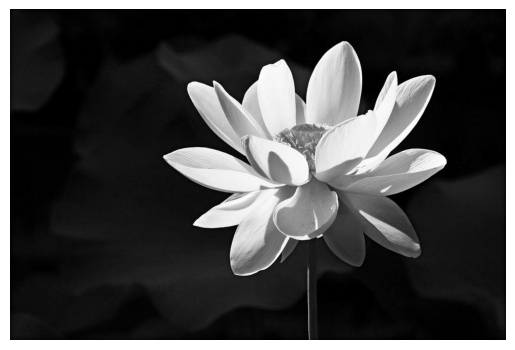

In [2]:
image = cv2.imread('../images/image-3.jpg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

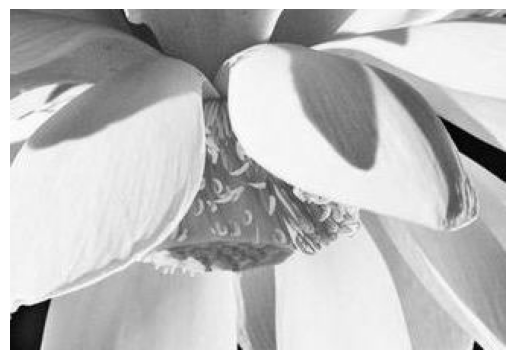

In [21]:
image_2 = cv2.imread('../images/image-3-2.jpg', 0)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [22]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2,None)

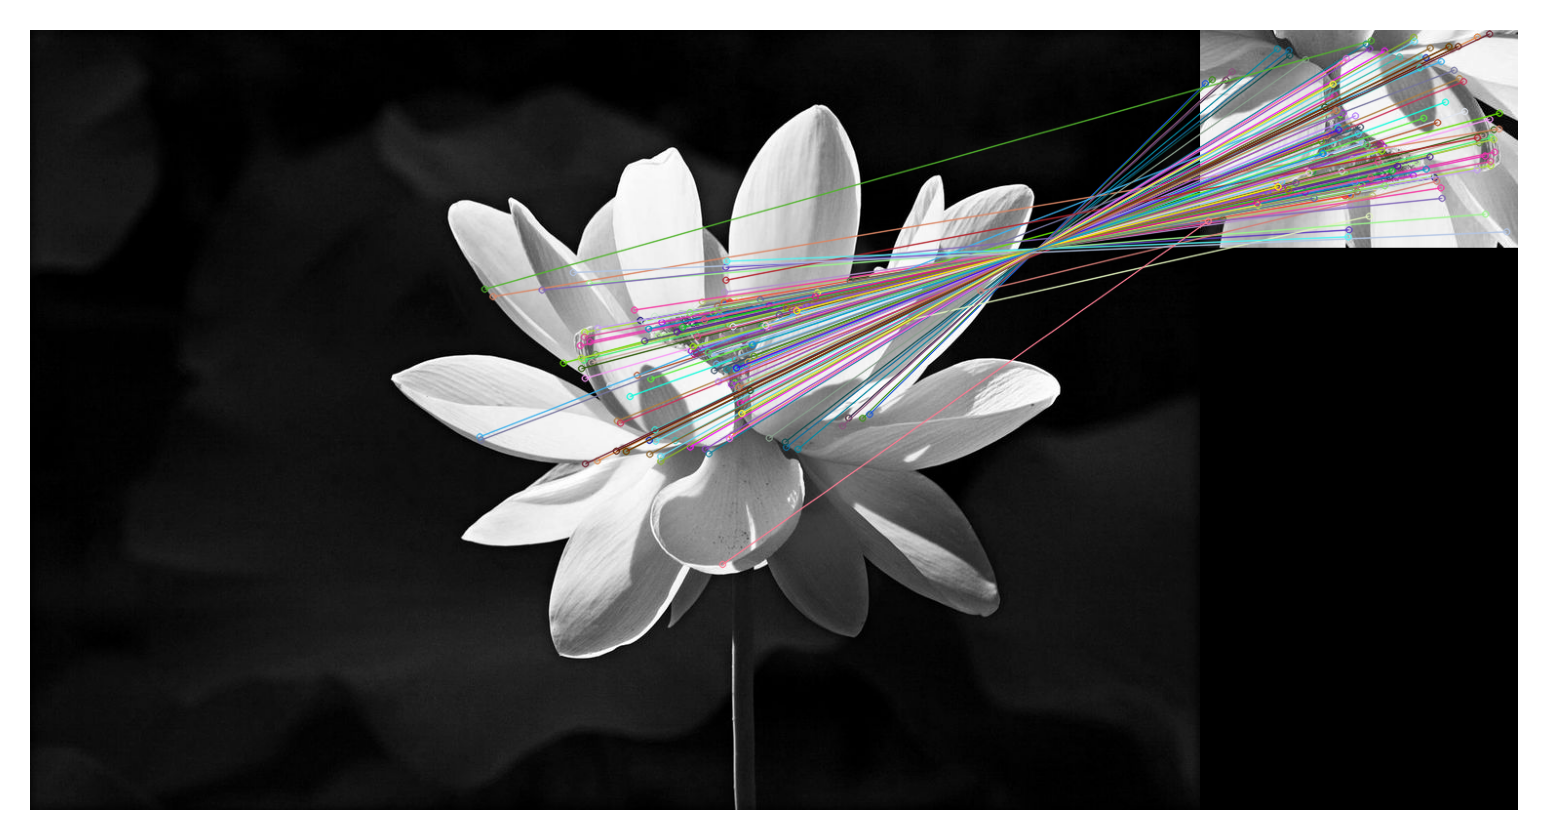

In [27]:
import cv2
import matplotlib.pyplot as plt

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

match_im = cv2.drawMatches(image, keypoints_1, image_2, keypoints_2, matches[:150], image_2, flags=2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [39]:
def own_matcher(img1, img2):
    # Create SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    matches = []
    # Loop through descriptors of keypoints from image1 and image2
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            # Compute cityblock (L1) distance between descriptors as match distance
            matches.append(cv2.DMatch(_distance=float(cityblock(d1, d2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    # Sort matches by distance (lower is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 150 matches
    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:150], None, matchesThickness=1, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return result

def bf(img1, img2):
    # Create SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect keypoints and compute descriptors for both images
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Create brute-force (BF) matcher using L1 distance
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    # Match descriptors of keypoints from image1 to image2
    matches = bf.match(des1, des2)

    # Sort matches by distance (lower is better)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 150 matches
    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:150], None, matchesThickness=1, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return result

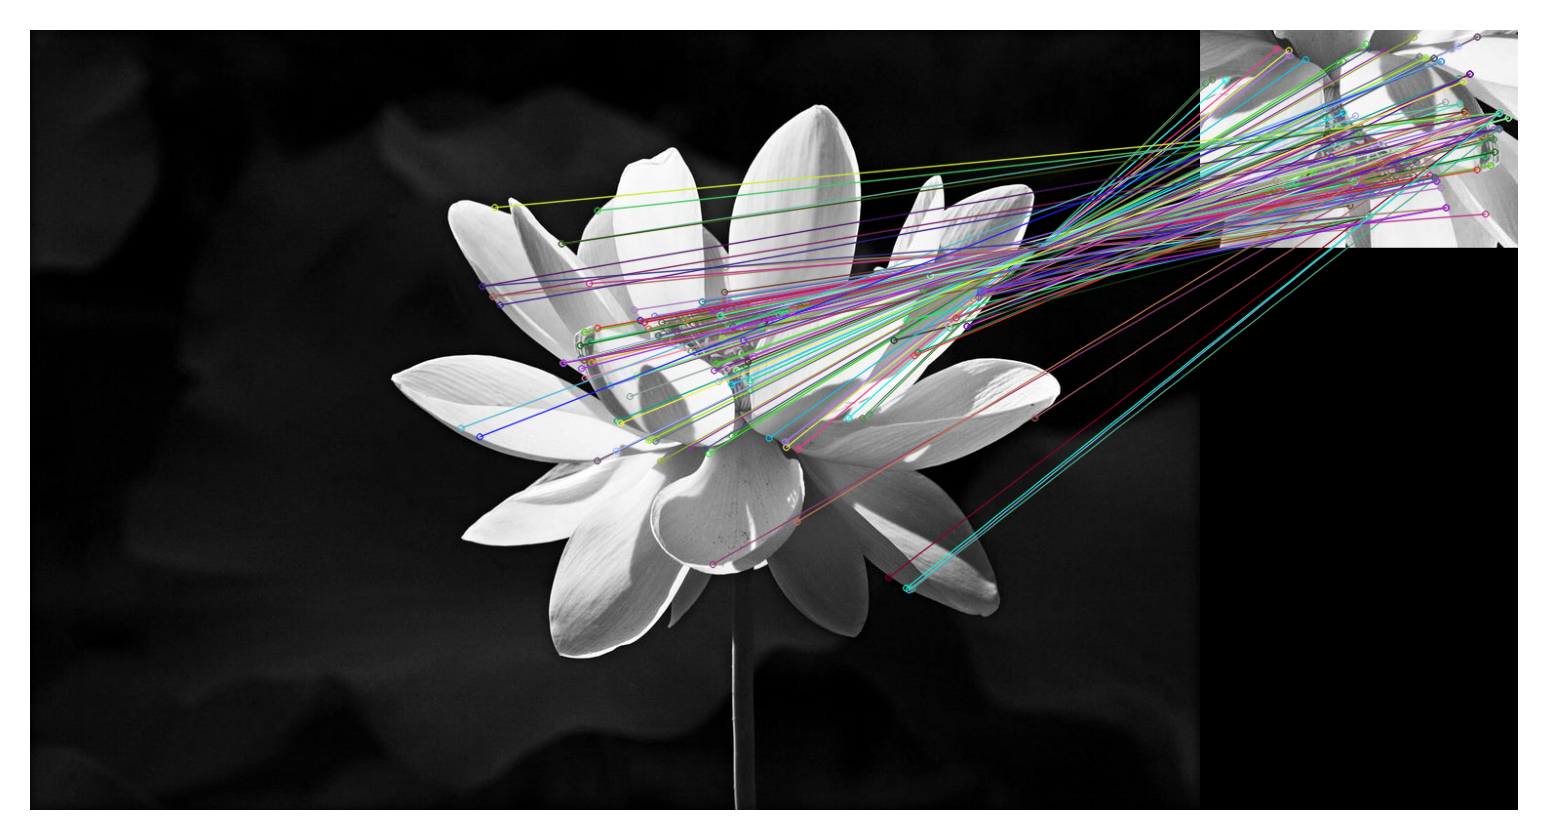

In [38]:
match_im = own_matcher(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

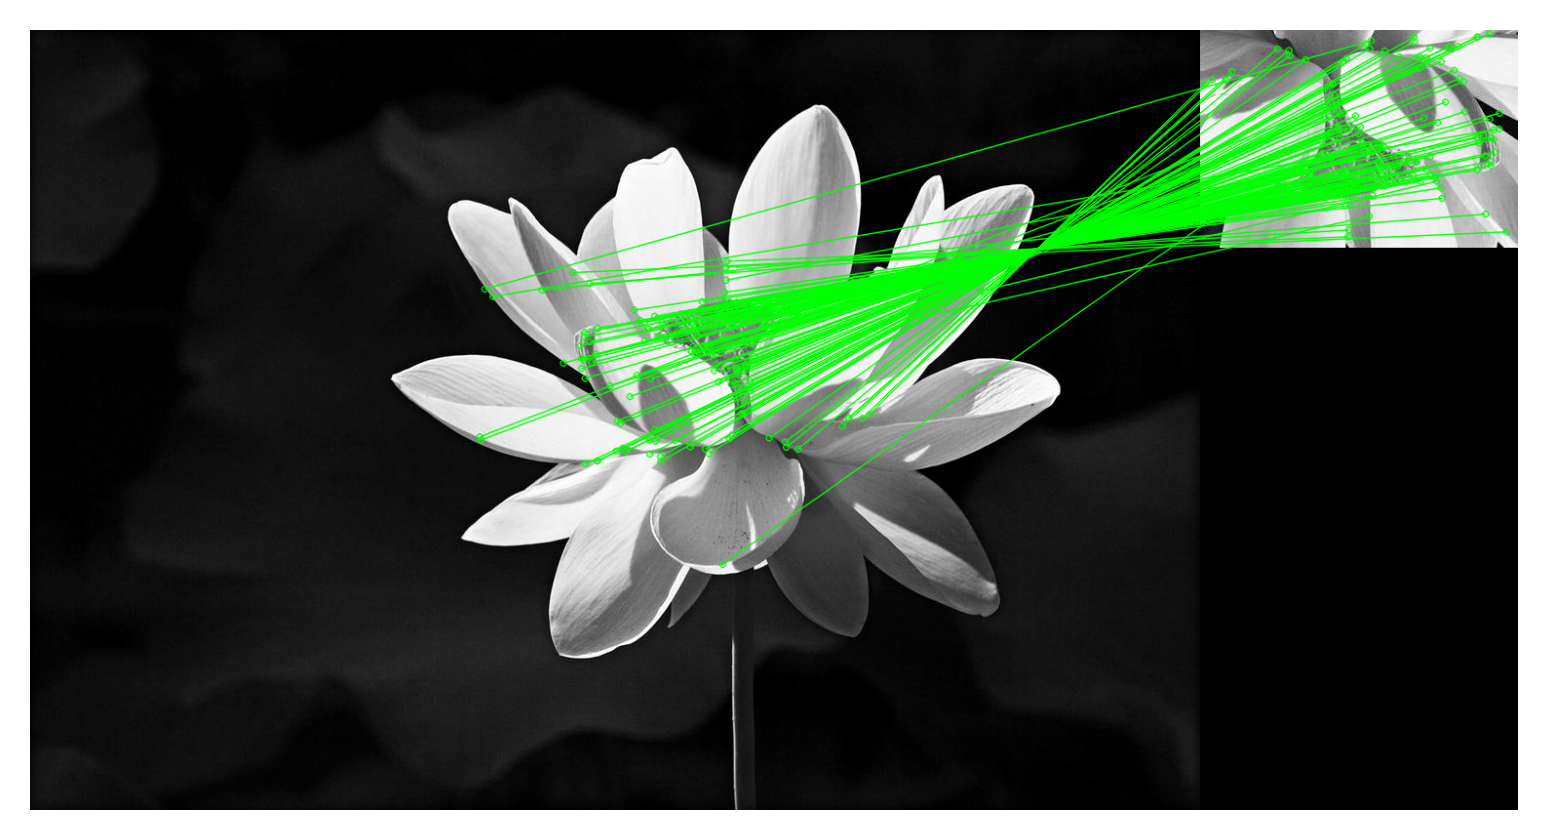

In [36]:
match_im = bf(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

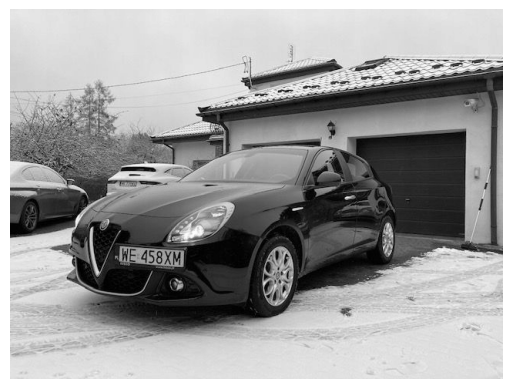

In [40]:
image = cv2.imread('../images/image-2.jpeg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

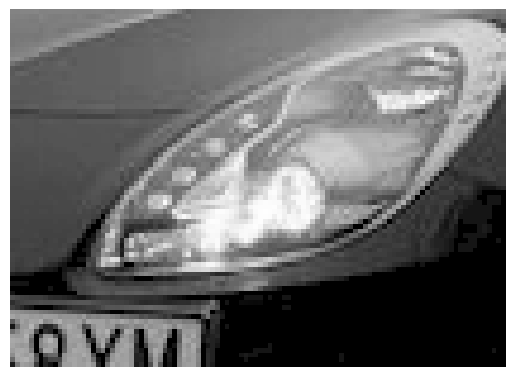

In [41]:
image_2 = cv2.imread('../images/image-2-cropped.png', 0)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

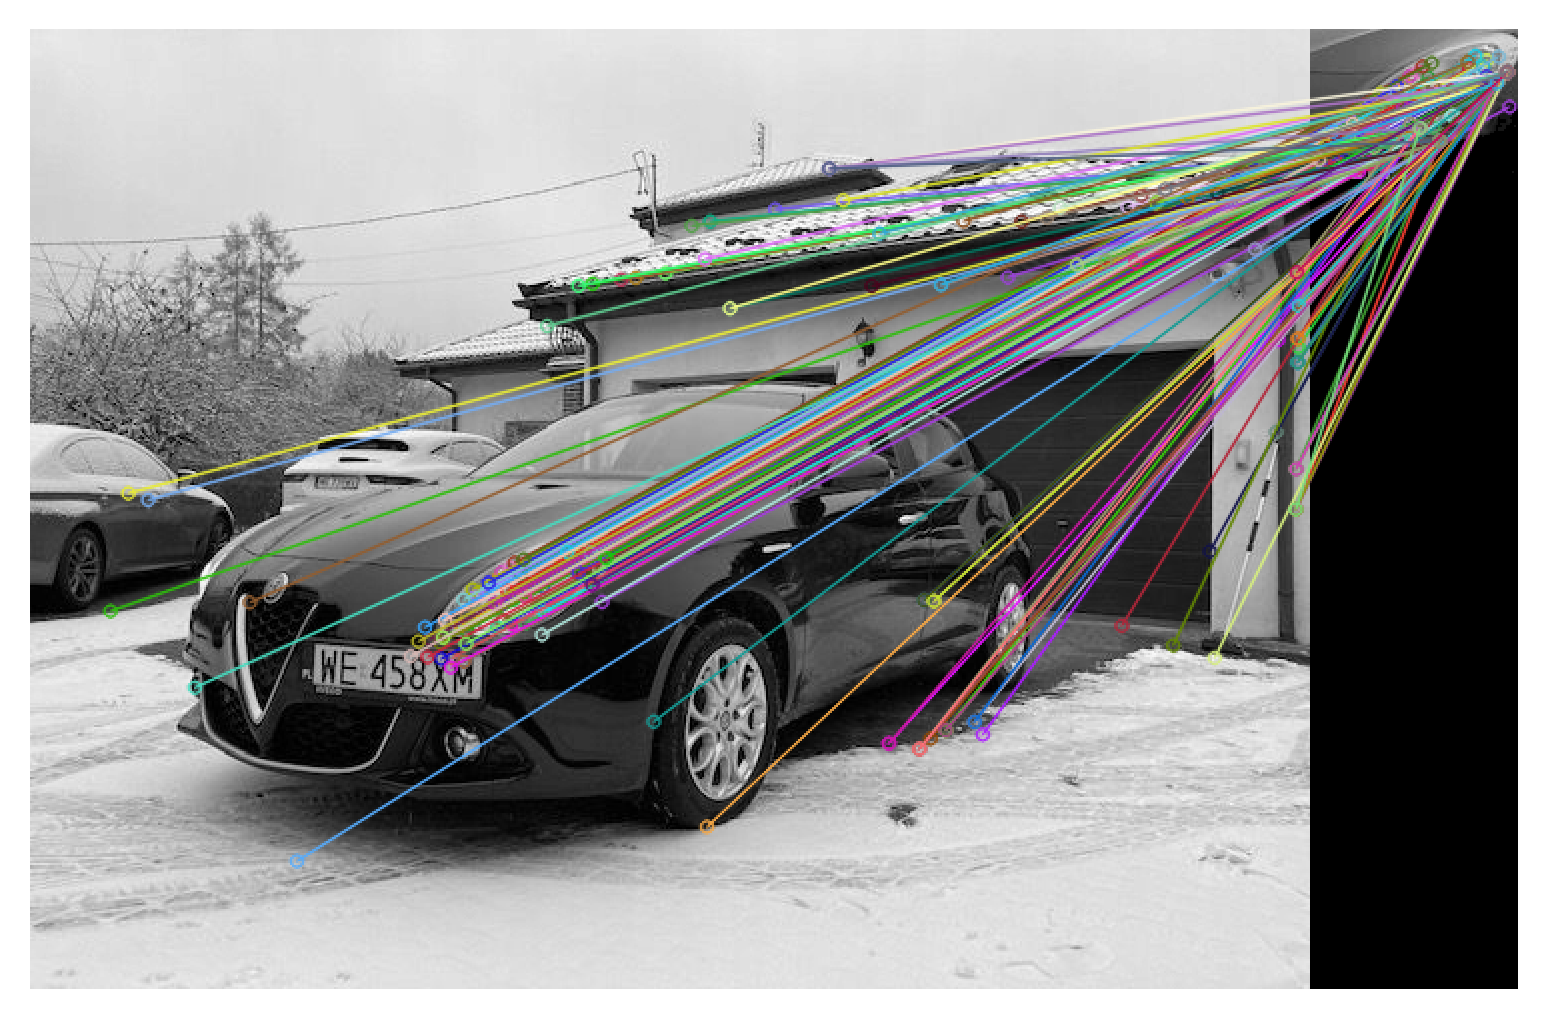

In [42]:
match_im = own_matcher(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

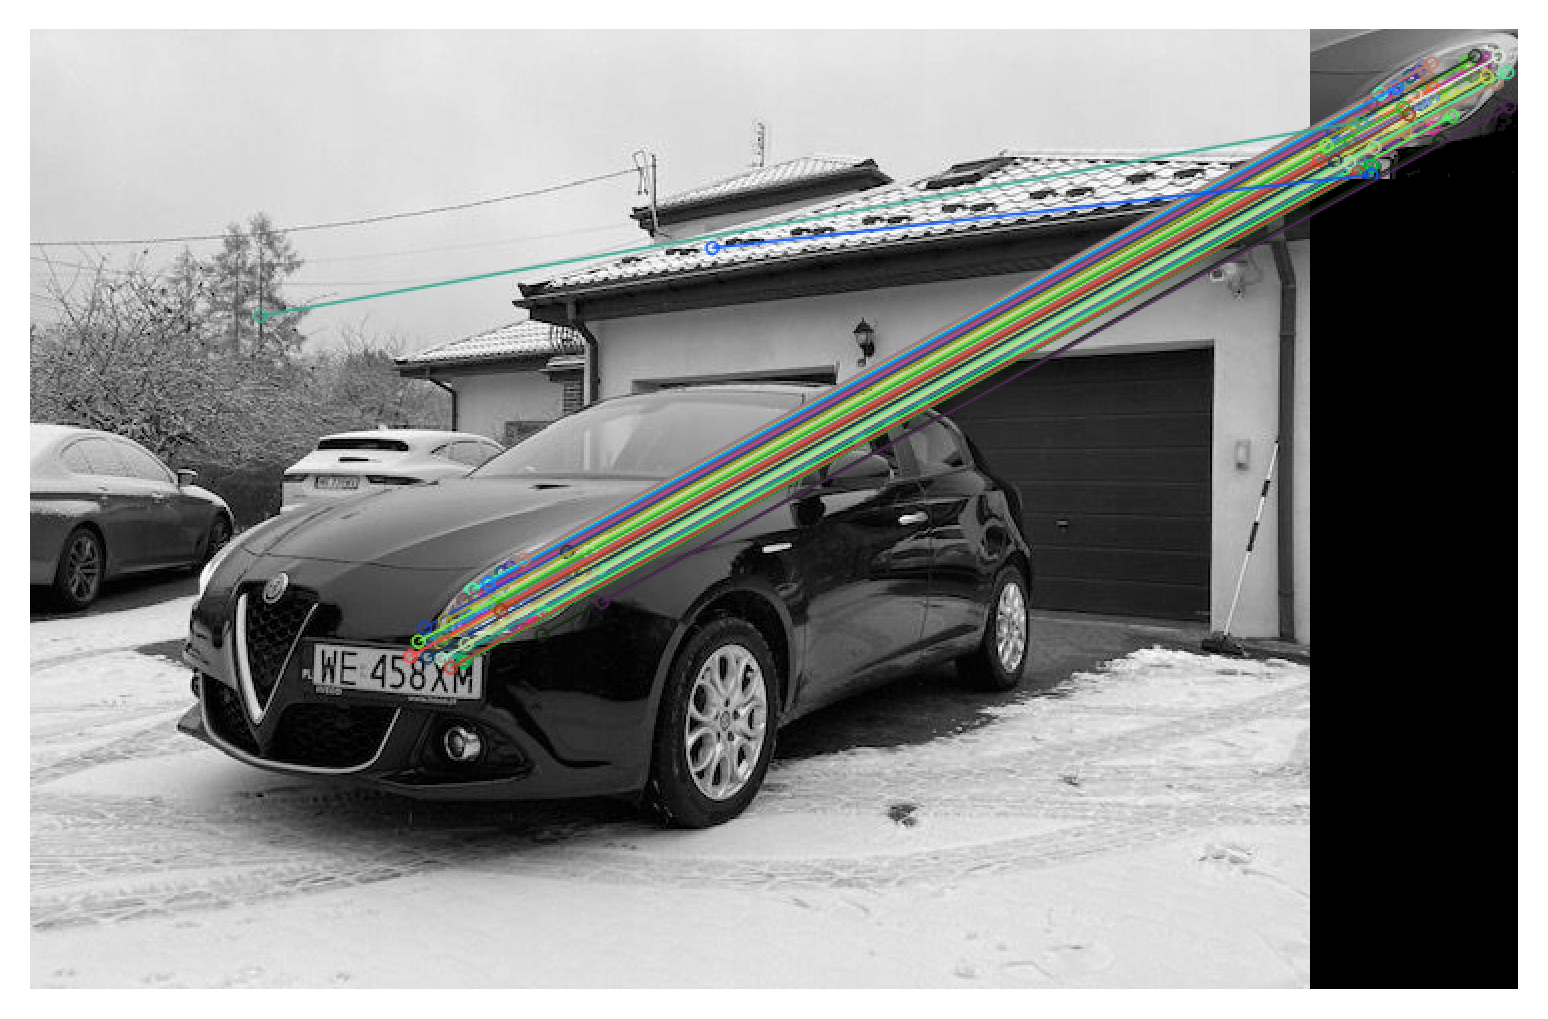

In [43]:
match_im = bf(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

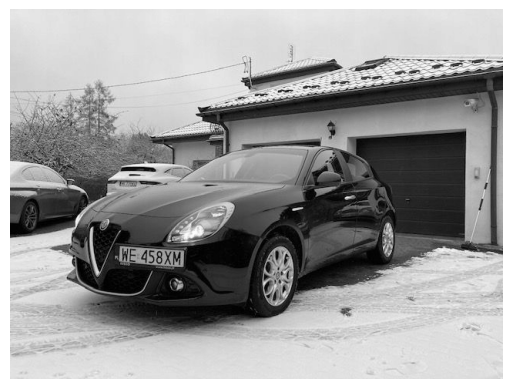

In [44]:
image = cv2.imread('../images/image-2.jpeg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


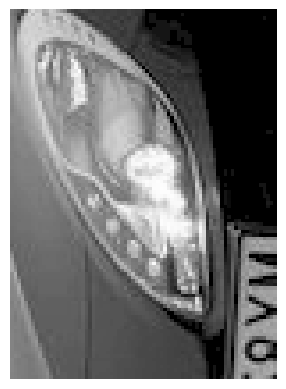

In [45]:
image_2 = cv2.imread('../images/image-2-cropped-rotated.png', 0)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


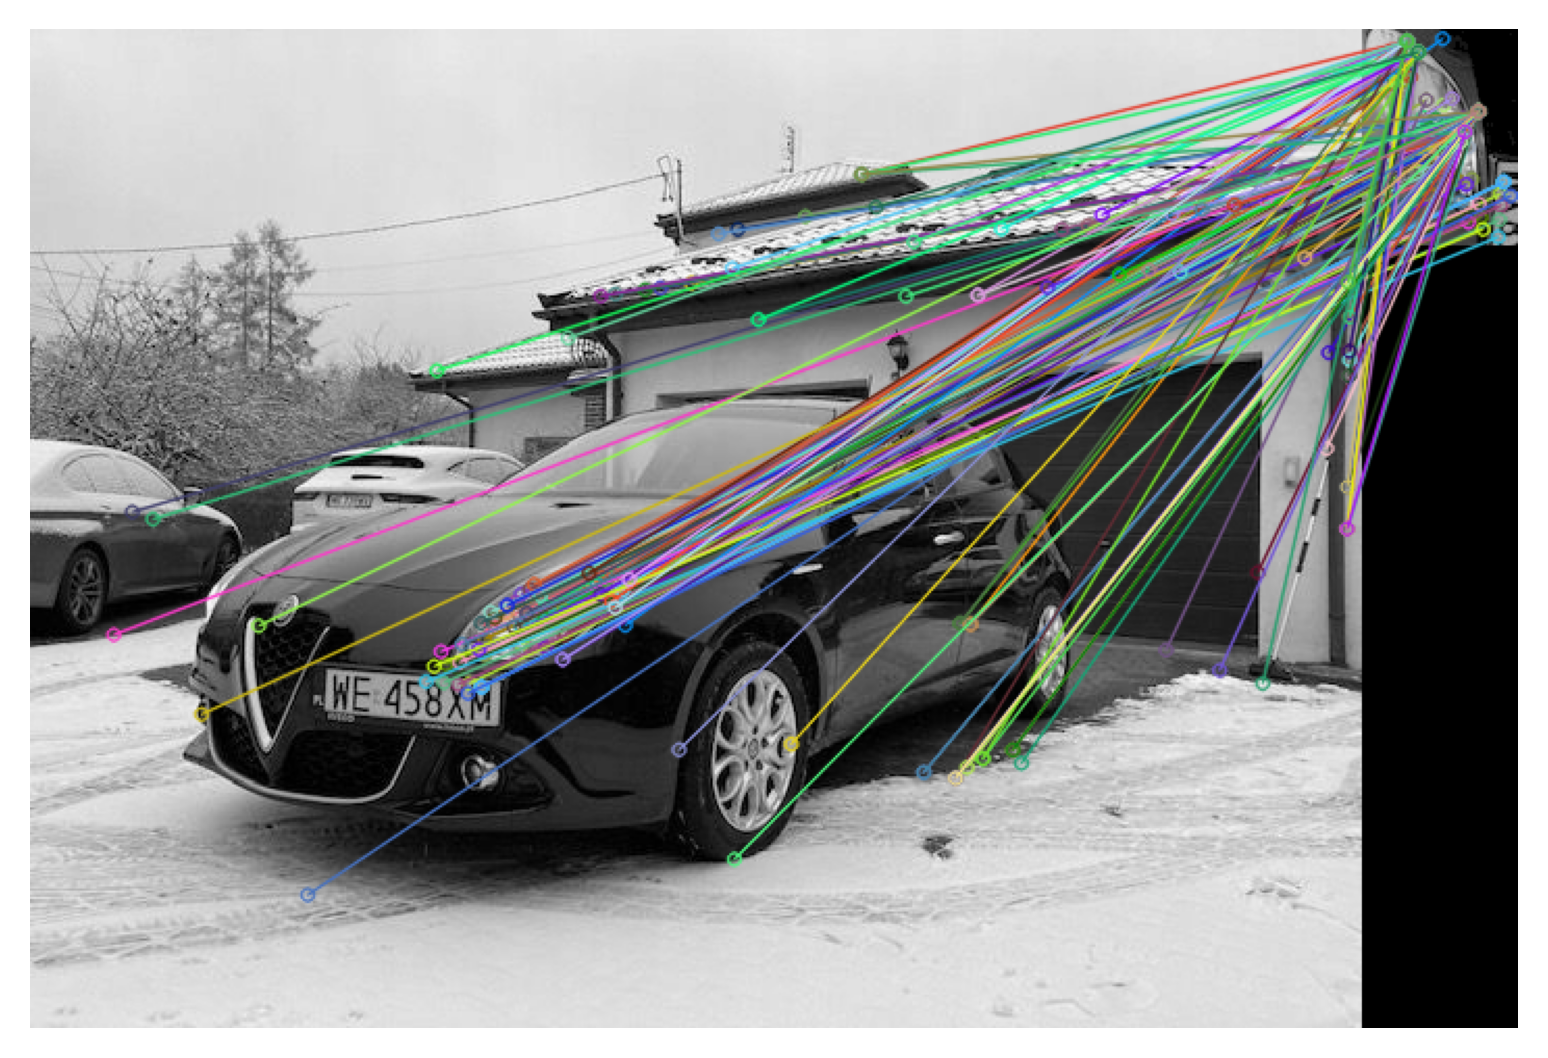

In [46]:
match_im = own_matcher(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


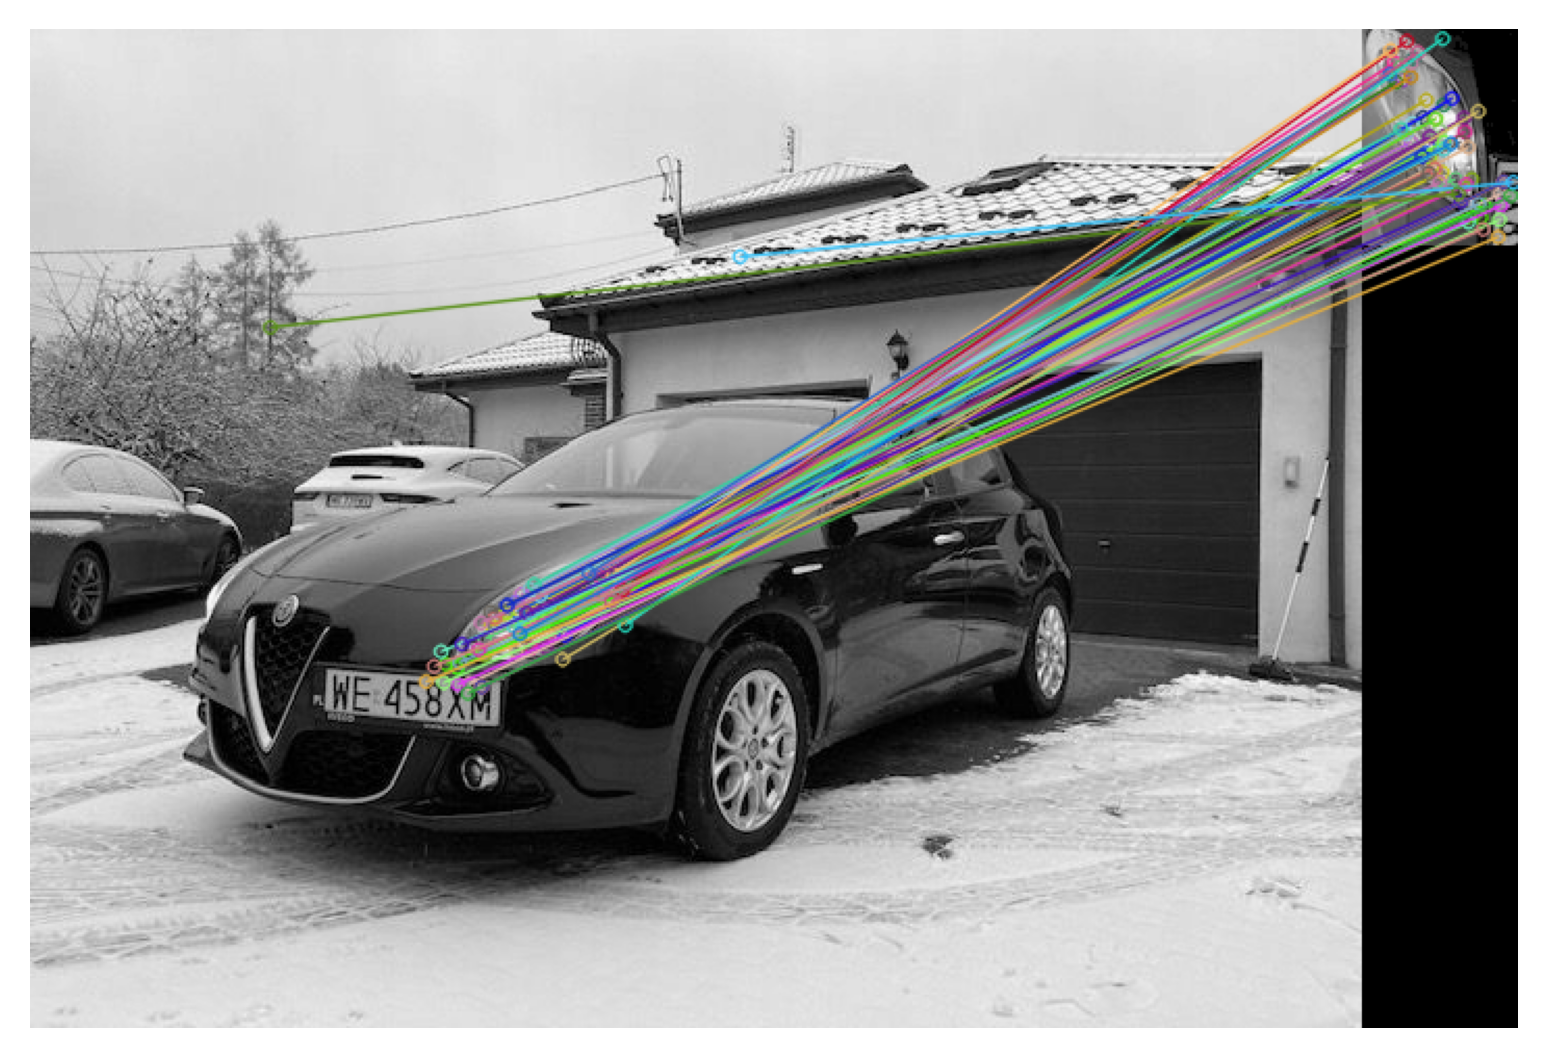

In [47]:
match_im = bf(image, image_2)

fig = plt.gcf()
fig.set_dpi(300)
plt.imshow(cv2.cvtColor(match_im, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()